In [40]:
#validate modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
print("OK")

OK


checking data

In [41]:
#load data
try:
    df = pd.read_csv("laptop_price - dataset.csv", encoding='latin-1')
except:
    df = pd.read_csv("laptop_price - dataset.csv")
#check data
print(df.shape)
print(df.columns)
print(df.isna().sum())
print(df.describe())

(1275, 15)
Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='str')
Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64
            Inches  CPU_Frequency (GHz)     RAM (GB)  Weight (kg)  \
count  1275.000000          1275.000000  1275.000000  1275.000000   
mean     15.022902             2.302980     8.440784     2.040525   
std       1.429470             0.503846     5.097809     0.669196   
min      10.100000             0.900000     2.000000     0.690000   
25%      14.

adjust data

In [42]:
# Remove leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Check if the 'RAM (GB)' column exists. If not, clean the column related to RAM
if 'RAM (GB)' not in df.columns:
    
    # If 'Ram' column exists, clean it by removing the "GB" and converting to integer
    if 'Ram' in df.columns:
        df["RAM (GB)"] = df["Ram"].str.replace("GB", "").astype(int)
    # If 'RAM' column exists, clean it similarly
    elif 'RAM' in df.columns:
        df["RAM (GB)"] = df["RAM"].str.replace("GB", "").astype(int)
    else:
        # If neither 'Ram' nor 'RAM' columns are found, print a warning
        print("Warning: Could not find 'Ram' column to clean.")
else:
    # If 'RAM (GB)' column already exists, print a message stating it's already cleaned
    print("RAM column is already cleaned (RAM (GB) exists).")

# Check if the 'Weight (kg)' column exists. If not, clean the column related to Weight
if 'Weight (kg)' not in df.columns:
    # If 'Weight' column exists, clean it by removing the "kg" and converting to float
    if 'Weight' in df.columns:
        df["Weight (kg)"] = df["Weight"].str.replace("kg", "").astype(float)
else:
    # If 'Weight (kg)' column already exists, print a message stating it's already cleaned
    print("Weight column is already cleaned (Weight (kg) exists).")

# If 'Price_euros' column exists, rename it to 'Price (Euro)'
if "Price_euros" in df.columns:
    df.rename(columns={"Price_euros": "Price (Euro)"}, inplace=True)

# Print the final status message and display the cleaned column names
print("\nData looks good! Here are the columns:")
print(df.columns.tolist())

# Display the first few rows of the cleaned dataframe
df.head()


RAM column is already cleaned (RAM (GB) exists).
Weight column is already cleaned (Weight (kg) exists).

Data looks good! Here are the columns:
['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)']


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


Plot the price of all the laptops



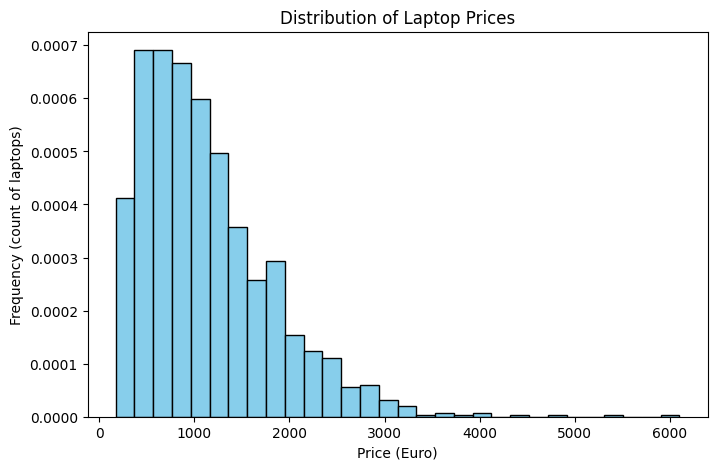

Number of laptops plotted: 1275
Min/Mean/Max price (Euro): 174.0 1134.9690588235292 6099.0


In [43]:



# Ensure the price column exists
price_col = "Price (Euro)"
assert price_col in df.columns, f"Column '{price_col}' not found. Available columns: {df.columns.tolist()}"

# Convert price to numeric (in case there are non-numeric values) and drop missing values
prices = pd.to_numeric(df[price_col], errors="coerce").dropna()

# Plot a histogram to visualize the price distribution
plt.figure(figsize=(8, 5))
plt.hist(df["Price (Euro)"], bins=30, density=True, color='skyblue', edgecolor='black')

plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euro)")
plt.ylabel("Frequency (count of laptops)")

plt.show()

# Optional: quick summary for documentation
print("Number of laptops plotted:", len(prices))
print("Min/Mean/Max price (Euro):", prices.min(), prices.mean(), prices.max())


Which company has on average the most expensive laptop? What is the average laptop price for each company?


In [44]:

# Make sure price is numeric (handles strings / missing values safely)
df["Price (Euro)"] = pd.to_numeric(df["Price (Euro)"], errors="coerce")

# Compute average price per company
company_avg = (
    df.groupby("Company")["Price (Euro)"]
      .mean()
      .sort_values(ascending=False)
)

# Company with the highest average price
top_company = company_avg.index[0]
top_avg_price = company_avg.iloc[0]

print("Company with highest average price:", top_company)
print("Average price (Euro):", top_avg_price)

# Show the average price for each company
company_avg

Company with highest average price: Razer
Average price (Euro): 3346.1428571428573


Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

Find the different types of Operating systems present in the data - under the column name "OpSys".
Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform


In [45]:
# Create a new cleaned OS column (do not overwrite the original)
df["OpSys_clean"] = df["OpSys"].astype("string").str.strip().str.lower()

# Standardize different spellings into the same OS label
df["OpSys_clean"] = df["OpSys_clean"].replace({
    "mac os": "macos",
    "macos x": "macos",
    "mac os x": "macos",
    "no os installed": "no os",
    "windows 10": "windows",
    "windows 7": "windows",
    "windows 10 s": "windows",})

# Show the final OS categories
df["OpSys_clean"].value_counts()




OpSys_clean
windows      1101
no os          66
linux          58
chrome os      27
macos          21
android         2
Name: count, dtype: Int64

 Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.


In [46]:

def clean_opsys(os_name):
    """function to clean and categorize operating system names"""
    os_str = str(os_name) # ensure it's a string
    
    # categorize based on keywords
    if 'Mac' in os_str or 'macOS' in os_str:
        return 'macOS'
    elif 'Windows' in os_str:
        return 'Windows'
    elif 'Linux' in os_str:
        return 'Linux'
    elif 'Chrome' in os_str:
        return 'Chrome OS'
    else:
        return 'Other'

# apply the function to create a new column
df['OpSys Category'] = df['OpSys'].apply(clean_opsys)


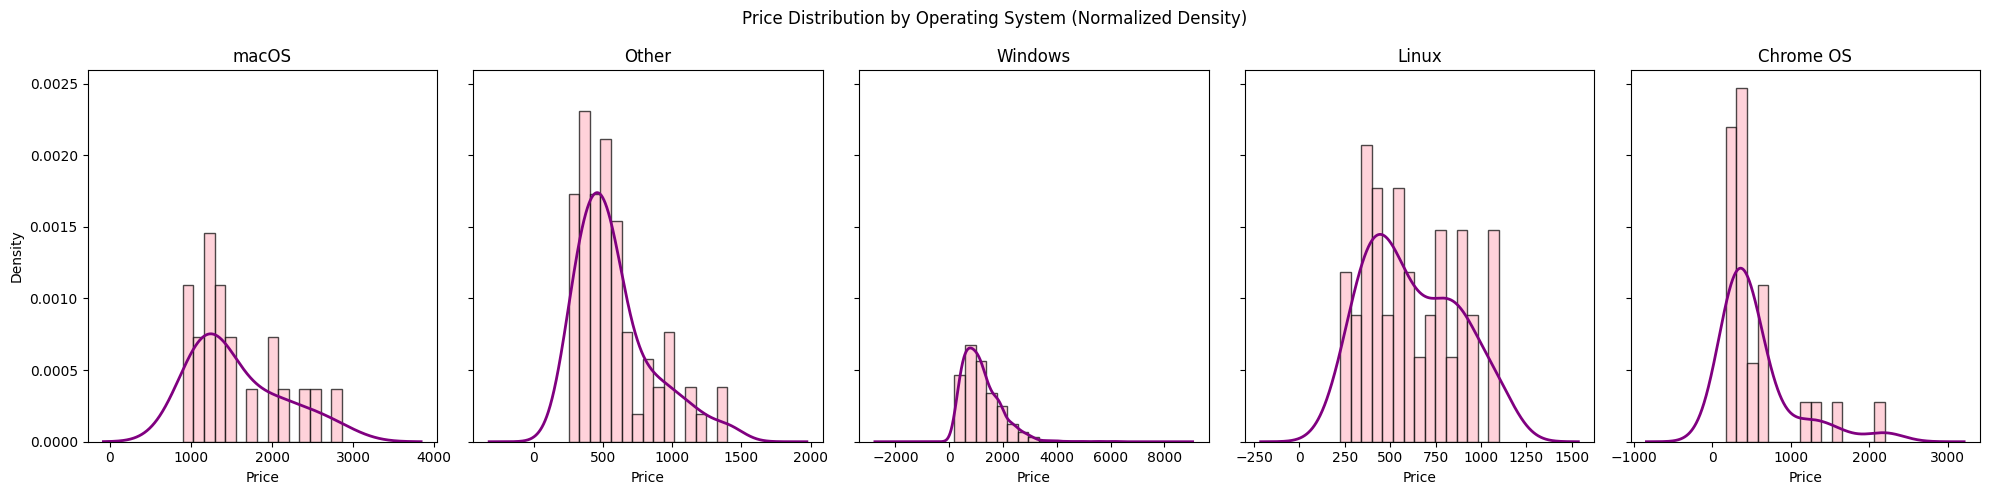

The company with the highest average price is: Razer


In [47]:
#set of unique operating systems
unique_os = df['OpSys Category'].unique()
#plot histograms of price distribution for each operating system
fig, axes = plt.subplots(1, len(unique_os), figsize=(20, 5), sharey=True)
fig.suptitle('Price Distribution by Operating System (Normalized Density)')
#loop through each operating system and plot histogram
for i, os in enumerate(unique_os):
    subset = df[df['OpSys Category'] == os]
    
    #plot histogram with density normalization
    axes[i].hist(subset['Price (Euro)'], bins=15, density=True, color='pink', edgecolor='black', alpha=0.7)
    
    #add kde for better visualization
    subset['Price (Euro)'].plot.kde(ax=axes[i], color='purple', linewidth=2)
    
    axes[i].set_title(os)
    axes[i].set_xlabel('Price')
    # add y-label only to the first subplot
    if i == 0:
        axes[i].set_ylabel('Density') 

plt.tight_layout()
plt.show()

# for each company, calculate the average price and identify the highest
avg_price_by_company = df.groupby("Company")["Price (Euro)"].mean().sort_values(ascending=False)
print(f"The company with the highest average price is: {avg_price_by_company.idxmax()}")

What is the relationship between RAM and computer price? add an adequate plot to support your findings. <<< check data for outliers, what would be considered as an outlier? How will you detect it ? >>>

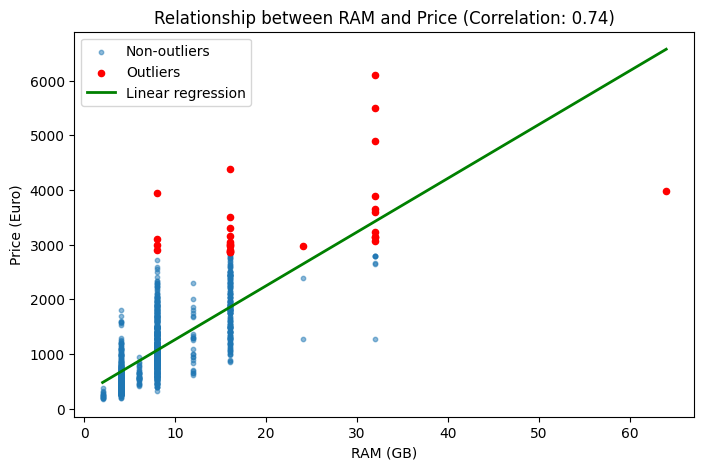

Number of price outliers: 28
Correlation coefficient: 0.740


In [48]:

# Define variables FIRST
x = pd.to_numeric(df["RAM (GB)"], errors="coerce")
y = pd.to_numeric(df["Price (Euro)"], errors="coerce")

# Remove missing values
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]
# calculate correlation
correlation_val = x.corr(y)

# Detect outliers using IQR (price)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (y < lower_bound) | (y > upper_bound)

# Fit regression using non-outliers
m, b = np.polyfit(x[~outlier_mask], y[~outlier_mask], 1)

x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

# Plot
plt.figure(figsize=(8, 5))

plt.scatter(x[~outlier_mask], y[~outlier_mask], s=10, alpha=0.5, label="Non-outliers")
plt.scatter(x[outlier_mask], y[outlier_mask], s=20, color='red', label="Outliers") # צבעתי באדום שיהיה ברור

plt.plot(x_line, y_line, color='green', linewidth=2, label="Linear regression")

plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")


plt.title(f"Relationship between RAM and Price (Correlation: {correlation_val:.2f})")
plt.legend()
plt.show()
#count and print number of outliers
print("Number of price outliers:", outlier_mask.sum())
#print the correlation value
print(f"Correlation coefficient: {correlation_val:.3f}")

Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

In [49]:
# Function to extract the storage technology from the "Memory" column
def extract_storage_type(memory):
    # Handle missing values
    if pd.isna(memory):
        return "Other"

    # Convert to lowercase for consistent matching
    memory = memory.lower()
    
    # list to hold found storage types
    found_types = []

    # Independent checks for each storage type
    if "ssd" in memory:
        found_types.append("SSD")
    if "hdd" in memory:
        found_types.append("HDD")
    if "flash storage" in memory or "flash" in memory:
        found_types.append("Flash Storage")
    if "hybrid" in memory:
        found_types.append("Hybrid")
    
    # no known types found
    if not found_types:
        return "Other"
    
    # string together the found types with plus signs
    return " + ".join(sorted(found_types))

# Create a new column with the extracted storage type
df["Storage type"] = df["Memory"].apply(extract_storage_type)

#check the unique storage types created (including combinations)
print("Unique Storage Types found:")
print(df["Storage type"].value_counts())

# הצצה לנתונים
df[["Memory", "Storage type"]].head(10)

Unique Storage Types found:
Storage type
SSD                    635
HDD                    359
HDD + SSD              200
Flash Storage           70
Hybrid                   8
Hybrid + SSD             2
Flash Storage + HDD      1
Name: count, dtype: int64


,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
5,500GB HDD,HDD
6,256GB Flash Storage,Flash Storage
7,256GB Flash Storage,Flash Storage
8,512GB SSD,SSD
9,256GB SSD,SSD
